In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv( './input/cleaned_data.csv',comment ='#')
data.head()

,id,Away_FreeKicksConceded,Away_HandlingErrors,Away_KickMetres,Away_Kicks,Away_LineBreaks,Away_LineOutsNotStraight,Away_LineOutsWon,Away_LineOutsWonAgainstThrow,Away_MissedTackes,...,Home_Possesion,Home_RunMetres,Home_Runs,Home_Score,Home_ScrumsWon,Home_SendOffs,Home_SinBins,Home_Tackles,Home_Territory,Url
0,0,2.0,7.0,960.0,26.0,0.0,1.0,6.0,0.0,21.0,...,0,580.0,91.0,20.0,8.0,0.0,1.0,90.0,0,//www.foxsports.com.au/rugby/super-rugby/match...
1,1,2.0,11.0,947.0,31.0,5.0,0.0,17.0,0.0,15.0,...,0,387.0,66.0,15.0,4.0,0.0,0.0,123.0,0,//www.foxsports.com.au/rugby/super-rugby/match...
2,2,2.0,6.0,1032.0,29.0,5.0,0.0,7.0,0.0,32.0,...,0,656.0,80.0,34.0,3.0,0.0,0.0,78.0,0,//www.foxsports.com.au/rugby/super-rugby/match...
3,3,1.0,9.0,591.0,22.0,5.0,0.0,8.0,0.0,22.0,...,0,546.0,91.0,32.0,9.0,0.0,0.0,82.0,0,//www.foxsports.com.au/rugby/super-rugby/match...
4,4,0.0,7.0,884.0,25.0,4.0,0.0,16.0,0.0,36.0,...,0,692.0,98.0,28.0,5.0,0.0,0.0,121.0,0,//www.foxsports.com.au/rugby/super-rugby/match...


979


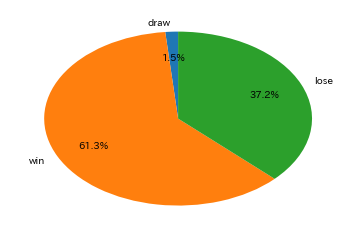

In [2]:
temp = data.query('Home_Territory == "0" & Away_Territory == "100"')
len(temp)

temp = data.copy()
temp['Diff_Score'] = temp['Home_Score'] - temp['Away_Score'] 
temp['Result'] = list(map(lambda x : 'draw' if x == 0 else 'win' if x > 0 else 'lose' , temp['Diff_Score']))
temp = temp.dropna(how='any')

temp.head()

x = {}
x['draw'] = len(temp.query('Result == "draw"'))
x['win'] = len(temp.query('Result == "win"'))
x['lose'] = len(temp.query('Result == "lose"'))


plt.pie(x.values(),labels = x.keys(), startangle=90, autopct="%.1f%%",
        pctdistance=0.7)
print(len(temp))

(array([  3.,  14.,  58., 207., 374., 220.,  75.,  21.,   5.,   2.]),
 array([-66. , -50.7, -35.4, -20.1,  -4.8,  10.5,  25.8,  41.1,  56.4,
         71.7,  87. ]),
 <a list of 10 Patch objects>)

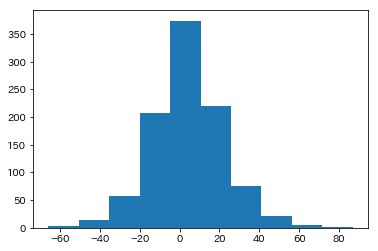

In [3]:

plt.hist(temp['Diff_Score'])

In [4]:
# 古いデータは欠損値があるので除外します
data = data.query('id > 94')
# 引き分けのデータは含めないことにします
data = data.query('Home_Score != Away_Score')

In [5]:
data.head()

,id,Away_FreeKicksConceded,Away_HandlingErrors,Away_KickMetres,Away_Kicks,Away_LineBreaks,Away_LineOutsNotStraight,Away_LineOutsWon,Away_LineOutsWonAgainstThrow,Away_MissedTackes,...,Home_Possesion,Home_RunMetres,Home_Runs,Home_Score,Home_ScrumsWon,Home_SendOffs,Home_SinBins,Home_Tackles,Home_Territory,Url
95,95,0.0,7.0,808.0,24.0,4.0,2.0,11.0,4.0,33.0,...,58,644.0,90.0,24.0,3.0,0.0,0.0,88.0,62,//www.foxsports.com.au/rugby/super-rugby/match...
96,96,4.0,13.0,454.0,10.0,5.0,1.0,9.0,0.0,33.0,...,61,756.0,117.0,28.0,9.0,0.0,0.0,107.0,57,//www.foxsports.com.au/rugby/super-rugby/match...
97,97,3.0,10.0,971.0,39.0,1.0,0.0,14.0,3.0,15.0,...,59,321.0,75.0,24.0,5.0,0.0,0.0,63.0,61,//www.foxsports.com.au/rugby/super-rugby/match...
98,98,0.0,3.0,1129.0,29.0,3.0,1.0,8.0,3.0,28.0,...,70,867.0,133.0,20.0,3.0,0.0,0.0,58.0,52,//www.foxsports.com.au/rugby/super-rugby/match...
99,99,3.0,13.0,557.0,13.0,2.0,0.0,10.0,2.0,12.0,...,59,297.0,64.0,21.0,8.0,0.0,1.0,102.0,54,//www.foxsports.com.au/rugby/super-rugby/match...


In [5]:
data['isHome'] = True

In [9]:
temp = data.copy()

temp['isWin']  = temp['Home_Score'] > temp['Away_Score']
temp['isOverPossesion'] = temp['Home_Possesion'] > temp['Away_Possesion']

print(round(len(temp.query('isWin == isOverPossesion')) / len(temp),2) * 100,'%')

55.00000000000001 %


In [2]:
new_data = pd.DataFrame()

exchange_columns = ['FreeKicksConceded','HandlingErrors','KickMetres','Kicks','LineBreaks','LineOutsNotStraight','LineOutsWon','LineOutsWonAgainstThrow','MissedTackes','Name','OffLoads','PenaltiesConceded','PhaseSevenPlus','Possesion','RunMetres','Runs','Score','ScrumsWon','SendOffs','SinBins','Tackles','Territory']

for index, row in data.iterrows():        
    values = []
    for column in data.columns:
        values.append(row[column])
    
    series = pd.Series(values, index=data.columns)
    series['isHome'] = 1
    new_data = new_data.append(series, ignore_index = True)
    
    copy_series = series.copy()
    copy_series['isHome'] = 0
    copy_series['id'] = 1000 + row['id']
    for exchange_name in exchange_columns:
        copy_series['Away_' + exchange_name] = row['Home_' + exchange_name]
        copy_series['Home_' + exchange_name] = row['Away_' + exchange_name]
        
    
    new_data = new_data.append(copy_series, ignore_index = True)

new_data.to_csv( './input/analyze_stats.csv' )

In [11]:
new_data.head()

,Away_FreeKicksConceded,Away_HandlingErrors,Away_KickMetres,Away_Kicks,Away_LineBreaks,Away_LineOutsNotStraight,Away_LineOutsWon,Away_LineOutsWonAgainstThrow,Away_MissedTackes,Away_Name,...,Home_Runs,Home_Score,Home_ScrumsWon,Home_SendOffs,Home_SinBins,Home_Tackles,Home_Territory,Url,id,isHome
0,0.0,5.0,606.0,17.0,8.0,0.0,11.0,1.0,15.0,Blues,...,61.0,22.0,6.0,0.0,0.0,116.0,38,//www.foxsports.com.au/rugby/super-rugby/match...,1095.0,0.0
1,1.0,13.0,742.0,17.0,5.0,0.0,13.0,6.0,16.0,Brumbies,...,79.0,20.0,4.0,0.0,1.0,157.0,43,//www.foxsports.com.au/rugby/super-rugby/match...,1096.0,0.0
2,3.0,10.0,1234.0,35.0,1.0,0.0,11.0,0.0,9.0,Sharks,...,45.0,9.0,4.0,0.0,0.0,109.0,39,//www.foxsports.com.au/rugby/super-rugby/match...,1097.0,0.0
3,0.0,11.0,561.0,16.0,3.0,1.0,14.0,0.0,15.0,Lions,...,46.0,24.0,5.0,0.0,1.0,173.0,48,//www.foxsports.com.au/rugby/super-rugby/match...,1098.0,0.0
4,0.0,8.0,707.0,19.0,2.0,0.0,13.0,1.0,11.0,Reds,...,70.0,20.0,7.0,0.0,1.0,91.0,46,//www.foxsports.com.au/rugby/super-rugby/match...,1099.0,0.0


In [20]:
print(len(new_data))
len(data)

1932


966

(array([966.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 966.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

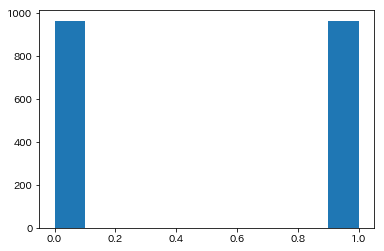

In [21]:

plt.hist(new_data['isHome'])
